Car Price Prediction

Predict the price of a given car using 
a) Linear Regression 
b) Lasso Regression

submitted by - Neethu Raj


In [1]:
# Import the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn import metrics

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
# Load the file and create dataset
file='C:/Data/car_age_price.csv'

data=pd.read_csv(file)

In [5]:
# Inspect the top 5 data
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
#Check the number of rows and columns
data.shape

#----- 112 rows and 2 columns

(112, 2)

In [7]:
# dataframe in detail

data.info()

#---- no null values found in any columns
#---- Both columns are of type int64 ie. numeric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
# Statistical summary of the Data Frame
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Data Preprocessing

In [9]:
# Confirm the presence of null values

data.isnull().sum()

#---- 0 null values in both the columns

Year     0
Price    0
dtype: int64

In [10]:
# check for the missing values

data.isna().sum()

#--- 0 mssing values

Year     0
Price    0
dtype: int64

In [11]:
# Check for duplicates

data.duplicated().sum()

54

In [12]:
data.duplicated

<bound method DataFrame.duplicated of      Year   Price
0    2018  465000
1    2019  755000
2    2019  700000
3    2018  465000
4    2018  465000
..    ...     ...
107  2016  375000
108  2014  300000
109  2015  425000
110  2016  420000
111  2015  425000

[112 rows x 2 columns]>

In [13]:
# Drop the duplicate data , all 54 columns

data=data.drop_duplicates()

In [14]:
data
# -- All duplicates are removed

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
5,2015,350000
6,2016,425000
7,2017,575000
8,2017,509999
10,2019,500000
11,2018,500000
12,2017,500000


In [15]:
# Statistical summary of the Data Frame
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,58.0,2016.568966,1.902096,2013.0,2015.0,2017.0,2018.0,2020.0
Price,58.0,474448.224138,105995.736551,300000.0,397000.0,475000.0,543750.0,755000.0


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Car Price'}, xlabel='Price'>

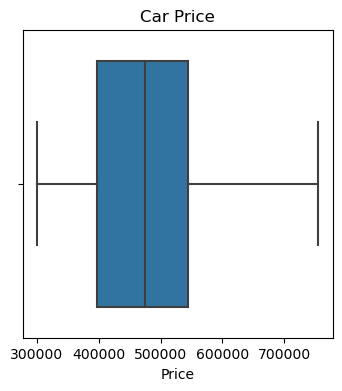

In [41]:
#Check for outliers
plt.subplots(figsize=(4,4))
plt.title('Car Price')
sns.boxplot(data['Price'])

#--- No Outliers found


In [17]:
#--- Correlation matrix
corr=data.corr()
corr

,Year,Price
Year,1.000000,0.807276
Price,0.807276,1.000000


<AxesSubplot:>

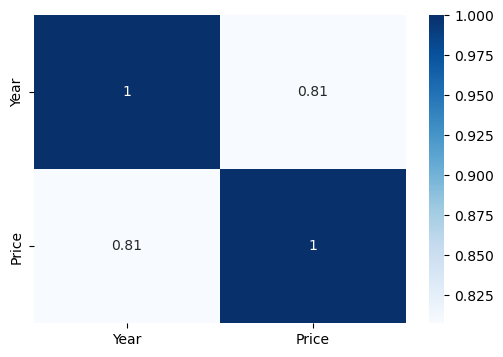

In [39]:
#--- Plot the correlation matrix
plt.subplots(figsize=(6,4))
sns.heatmap(corr,annot=True,cmap="Blues")

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Car Price Distribution Plot'}, xlabel='Price', ylabel='Density'>

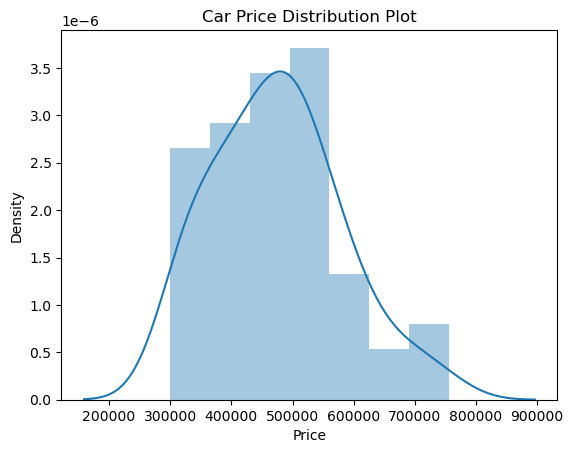

In [19]:
#--Plot the distribution
plt.title('Car Price Distribution Plot')
sns.distplot(data.Price)

Split Dependent and Independent variable
Target Variable\Dependent variable Y =Price
Independent variable x= Year

In [20]:
x=data.drop(['Year'],axis=1)
y=data['Price']

 Split Training and Test Data

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

 Model Training

a) Linear Regression


In [22]:
# Create the model
lin_model=linear_model.LinearRegression()

#Fit the training data to model
lin_model.fit(x_train,y_train)

# Evaluate the model

#----- Prediction on training data
lin_y_pred_train=lin_model.predict(x_train)


In [23]:
MSE_train=mean_squared_error(y_train,lin_y_pred_train)
print("Linear Regression MSE =",MSE_train)

Linear Regression MSE = 1.1819064380292563e-21


In [24]:
R2_Score_train=r2_score(y_train,lin_y_pred_train)
print("Linear Regression R^2 Score on training data=",R2_Score_train)

Linear Regression R^2 Score on training data= 1.0


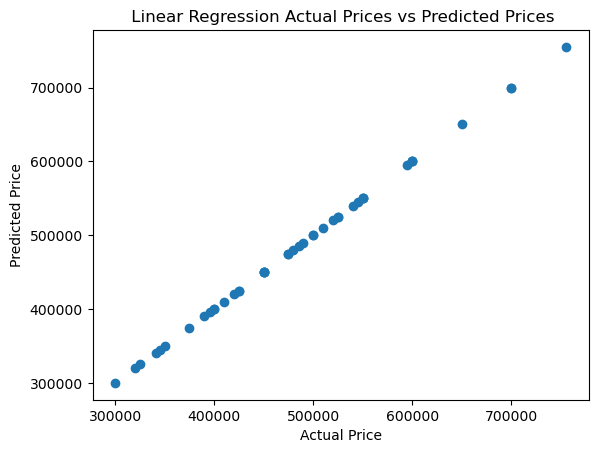

In [25]:
plt.scatter(y_train, lin_y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Linear Regression Actual Prices vs Predicted Prices")
plt.show()

In [26]:
#----- Prediction on test data
lin_y_pred_test=lin_model.predict(x_test)

In [27]:
MSE_test=mean_squared_error(y_test,lin_y_pred_test)
print("Linear Regression MSE on test data =",MSE_test)

Linear Regression MSE on test data = 1.5811281682080273e-21


In [28]:
R2_Score_test=r2_score(y_test,lin_y_pred_test)
print("Linear Regression R^2 Score on test data =",R2_Score_test)

Linear Regression R^2 Score on test data = 1.0


b) Lasso regression


In [29]:
# Load the regression model
lasso_reg_model=Lasso()

In [30]:
# Fit the model with training data
lasso_reg_model.fit(x_train,y_train)

Lasso()

In [31]:
# ----- prediction on training data
lasso_y_pred_train=lasso_reg_model.predict(x_train)

In [32]:
#R squared Error
R2_score_lasso_train=metrics.r2_score(y_train,lasso_y_pred_train)
print('R^2 score (Training data):',R2_score_lasso_train)

R^2 score (Training data): 1.0


In [33]:
MSE_Lasso_train= mean_squared_error(y_train,lasso_y_pred_train)
print("Linear Regression MSE on training data =",MSE_Lasso_train)

Linear Regression MSE on training data = 8.949803041542502e-11


In [34]:
# ----- prediction on test data
lasso_y_pred_test=lasso_reg_model.predict(x_test)

In [35]:
MSE_Lasso_test= mean_squared_error(y_test,lasso_y_pred_test)
print("Linear Regression MSE on test data =",MSE_Lasso_test)

Linear Regression MSE on test data = 8.867881331732714e-11


In [36]:
#R squared Error
R2_score_lasso_test=metrics.r2_score(y_test,lasso_y_pred_test)
print('R^2 score (Test data):',R2_score_lasso_test)

R^2 score (Test data): 1.0


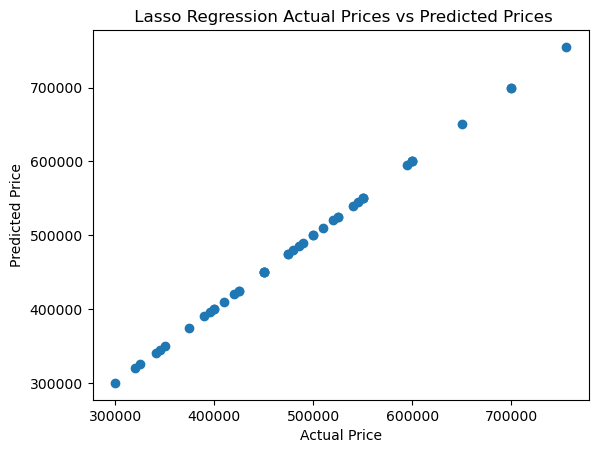

In [37]:
plt.scatter(y_train, lasso_y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Lasso Regression Actual Prices vs Predicted Prices")
plt.show()

In [38]:

print("Model 	R_squared 	MSE_train   	MSE_test ")
print("----	------------------------------------------ ")
print("Linear 	",R2_Score_test," 	",MSE_train, "	",MSE_test)
print("Lasso	",R2_score_lasso_test, "	",MSE_Lasso_train," 	",MSE_Lasso_test)

Model 	R_squared 	MSE_train   	MSE_test 
----	------------------------------------------ 
Linear 	 1.0  	 1.1819064380292563e-21 	 1.5811281682080273e-21
Lasso	 1.0 	 8.949803041542502e-11  	 8.867881331732714e-11


Linear model is the best fit when comparing with Lasso for the car price prediction on the given data.